In [3]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [4]:
# !kaggle datasets download -d omkargurav/face-mask-dataset
!pip install tensorflow-macos tensorflow-metal keras


In [5]:
# !unzip face-mask-dataset.zip


In [6]:
# pip install keras

In [4]:
import os

In [5]:
import cv2
import matplotlib.pyplot as plt

In [6]:
from PIL import Image

In [7]:
categories=["with_mask","without_mask"]

In [8]:
# with_mask_dir="/content/data/with_mask"
# without_mask_dir="/content/data/without_mask"

# with_mask_files=os.listdir(with_mask_dir)
# without_mask_files=os.listdir(without_mask_dir)



In [12]:
data=[]
for category in categories:
  path=os.path.join("/Users/ayamkattel/Desktop/100 days of DL/Face_Mask_Detection/data",category)
  label=categories.index(category)
  for file in os.listdir(path):
    print(file)  
    img_path=os.path.join(path,file)
    print(img_path)
    img=cv2.imread(img_path)
    img=cv2.resize(img,(224,224))
    # print(img.shape)
    data.append([img,label])




with_mask_2140.jpg
with_mask_1449.jpg
with_mask_2626.jpg
with_mask_942.jpg
with_mask_3538.jpg
with_mask_2632.jpg
with_mask_956.jpg
with_mask_2154.jpg
with_mask_1475.jpg
with_mask_3262.jpg
with_mask_3504.jpg
with_mask_1313.jpg
with_mask_1307.jpg
with_mask_3510.jpg
with_mask_3276.jpg
with_mask_2168.jpg
with_mask_1461.jpg
with_mask_2183.jpg
with_mask_981.jpg
with_mask_759.jpg
with_mask_2829.jpg
with_mask_995.jpg
with_mask_2197.jpg
with_mask_3289.jpg
with_mask_2801.jpg
with_mask_765.jpg
with_mask_2815.jpg
with_mask_771.jpg
with_mask_598.jpg
with_mask_2424.jpg
with_mask_40.jpg
with_mask_1893.jpg
with_mask_2342.jpg
with_mask_2356.jpg
with_mask_3048.jpg
with_mask_1887.jpg
with_mask_1139.jpg
with_mask_54.jpg
with_mask_2430.jpg
with_mask_1111.jpg
with_mask_3706.jpg
with_mask_2418.jpg
with_mask_3060.jpg
with_mask_1677.jpg
with_mask_1663.jpg
with_mask_3074.jpg
with_mask_3712.jpg
with_mask_68.jpg
with_mask_1105.jpg
with_mask_83.jpg
with_mask_2381.jpg
with_mask_1688.jpg
with_mask_1850.jpg
with_mask

In [66]:

import random


In [67]:
random.shuffle(data)#because first the data was of with mask and then only without mask
data=random.sample(data,1000)

In [68]:
X=[]
y=[]
for features,label in data:
  X.append(features)
  y.append(label)


In [69]:

len(X)

1000

In [70]:
import numpy as np

In [71]:
X=np.array(X)
y=np.array(y)

In [72]:
print(X.shape)
y.shape

(1000, 224, 224, 3)


(1000,)

In [73]:
X=X/255 #Normalize

In [74]:
X

array([[[[0.1254902 , 0.10588235, 0.10980392],
         [0.10588235, 0.08627451, 0.09019608],
         [0.08235294, 0.0627451 , 0.06666667],
         ...,
         [0.10980392, 0.09019608, 0.09411765],
         [0.15294118, 0.13333333, 0.1372549 ],
         [0.18823529, 0.16862745, 0.17254902]],

        [[0.10588235, 0.09019608, 0.09411765],
         [0.09803922, 0.07843137, 0.08235294],
         [0.08627451, 0.06666667, 0.07058824],
         ...,
         [0.09803922, 0.07843137, 0.08235294],
         [0.13333333, 0.11372549, 0.11764706],
         [0.16470588, 0.14509804, 0.14901961]],

        [[0.09019608, 0.07058824, 0.0745098 ],
         [0.09019608, 0.07058824, 0.0745098 ],
         [0.09411765, 0.0745098 , 0.07843137],
         ...,
         [0.08235294, 0.05882353, 0.06666667],
         [0.10588235, 0.08627451, 0.09019608],
         [0.12941176, 0.10980392, 0.11372549]],

        ...,

        [[0.97647059, 0.96862745, 0.96470588],
         [0.97647059, 0.96862745, 0.96470588]

In [75]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
X_train.shape

(800, 224, 224, 3)

In [77]:
from keras.applications.vgg16 import VGG16


In [78]:
vgg=VGG16()

In [79]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#Now we have to remove that Dense layer and add our own
from keras.models import  Sequential


In [28]:
model=Sequential()

In [29]:
vgg.layers[:-1]

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=fc1, built=True>,
 <Dense name=fc2, built=True>]

In [30]:
for layer in vgg.layers[:-1]:#iterates througha all vgg layers except the last layer
  model.add(layer)

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
for layer in model.layers:
  layer.trainable=False


In [81]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,272,837 (512.21 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 134,264,641 (512.18 MB)

 Optimizer params: 8,196 (32.02 KB)

In [82]:
from tensorflow.keras.layers import Dense


In [83]:
model.add(Dense(1,activation="sigmoid"))

In [84]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         4,097 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,272,839 (512.21 MB)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 134,264,641 (512.18 MB)

 Optimizer params: 8,196 (32.02 KB)

In [37]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [85]:
history=model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8138 - loss: 0.3874 - val_accuracy: 0.7250 - val_loss: 0.4849
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8225 - loss: 0.3839 - val_accuracy: 0.8850 - val_loss: 0.3218
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8462 - loss: 0.3425 - val_accuracy: 0.8700 - val_loss: 0.3121
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7975 - loss: 0.4010 - val_accuracy: 0.8250 - val_loss: 0.3736
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8737 - loss: 0.3047 - val_accuracy: 0.9300 - val_loss: 0.2599


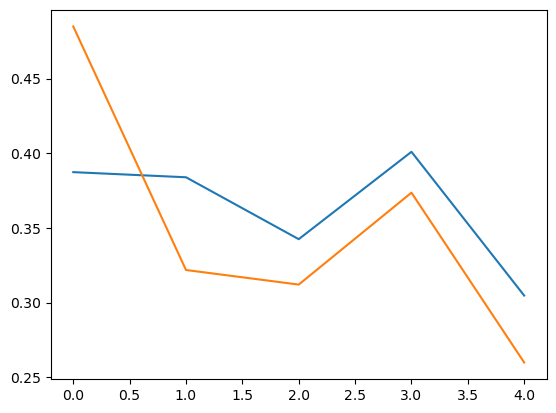

In [86]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [52]:
#For video using openCV
# from google.colab.patches import cv2_imshow

# cap=cv2.VideoCapture(0)

In [87]:
def detect_face_mask(img):
  y_pred=model.predict(img.reshape(1,224,224,3))
  return y_pred.round()[0][0]


In [88]:
def draw_label(img,text,pos,bg_color):
    text_size=cv2.getTextSize(text,cv2.FONT_HERSHEY_SIMPLEX,1,cv2.FILLED)

    end_x=pos[0]+text_size[0][0]+2
    end_y=pos[1]+text_size[0][1]-2

    cv2.rectangle(img, pos, (end_x, end_y), bg_color, -1)    

In [89]:
# while True:
#   ret,frame=cap.read()
#   cv2.imshow("window",frame)
#   img=cv2.resize(frame,(224,224))
#   pred=detect_face_mask(img)
#   if(pred==0):
#       draw_label(frame,"Mask",(10,10),(0,255,0))
#   else:
#       draw_label(frame,"No Mask",(10,10),(0,0,255))
      
#   if cv2.waitKey(1) & 0xFF ==ord("x"):
#     break
# cv2.destroyAllWindows()


In [ ]:
import cv2

def draw_label(img, text, pos, bg_color):
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_scale = 0.8
    thickness = 2

    # Get text size (returns (width, height))
    text_size, _ = cv2.getTextSize(text, font, text_scale, thickness)
    text_w, text_h = text_size  # unpack properly

    # Compute bottom-right corner of background rectangle
    end_x = pos[0] + text_w + 10
    end_y = pos[1] + text_h + 10

    # Draw filled rectangle as background
    cv2.rectangle(img, pos, (end_x, end_y), bg_color, -1)

    # Draw text over it
    cv2.putText(img, text, (pos[0], pos[1] + text_h),
                font, text_scale, (255, 255, 255), thickness, cv2.LINE_AA)


# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Resize for model input
    img = cv2.resize(frame, (224, 224))

    # Get prediction from your model
    pred = detect_face_mask(img)  # 0 = Mask, 1 = No Mask

    # Draw label on frame
    print(pred)
    if pred == 0:
        draw_label(frame, "Mask", (10, 30), (0, 255, 0))
    else:
        draw_label(frame, "No Mask", (10, 30), (0, 0, 255))

    # Show video feed
    cv2.imshow("Face Mask Detection", frame)

    # Exit if 'x' is pressed
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms